In [1]:
#Data Augmentation
import numpy as np
from PIL import Image, ImageEnhance
import random
import matplotlib.pyplot as plt

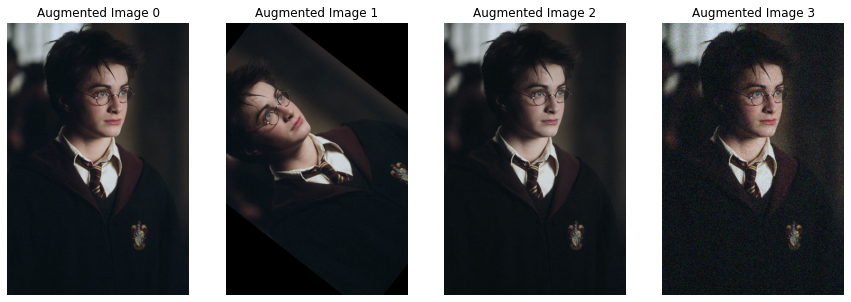

In [3]:
def random_rotation(image):
    angle = random.randint(0, 360)  # Random rotation between 0 and 360 degrees
    return image.rotate(angle)

def random_color(image):
    enhancer = ImageEnhance.Color(image)
    factor = random.uniform(0.5, 1.5)  # Random color factor
    return enhancer.enhance(factor)

def add_noise(image):
    np_image = np.array(image)
    noise = np.random.normal(0, 25, np_image.shape)  # Gaussian noise
    noisy_image = np.clip(np_image + noise, 0, 255)  # Ensure values stay within [0, 255]
    return Image.fromarray(noisy_image.astype(np.uint8))

def augment_image(image_path):
    # Load the image
    image = Image.open(image_path)

    # Apply random transformations
    augmented_images = []
    augmented_images.append(image)  # Original image

    augmented_images.append(random_rotation(image))
    augmented_images.append(random_color(image))
    augmented_images.append(add_noise(image))

    return augmented_images

# Example usage
image_path = "C:/Users/Qureshi/OneDrive/Desktop/88.jpg"  # Replace with your image path
augmented_images = augment_image(image_path)

# Display the original and augmented images
fig, ax = plt.subplots(1, len(augmented_images), figsize=(15, 5))
for i, img in enumerate(augmented_images):
    ax[i].imshow(img)
    ax[i].axis('off')  # Hide axis
    ax[i].set_title(f'Augmented Image {i}')  # Title for each image

plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\Qureshi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Qureshi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


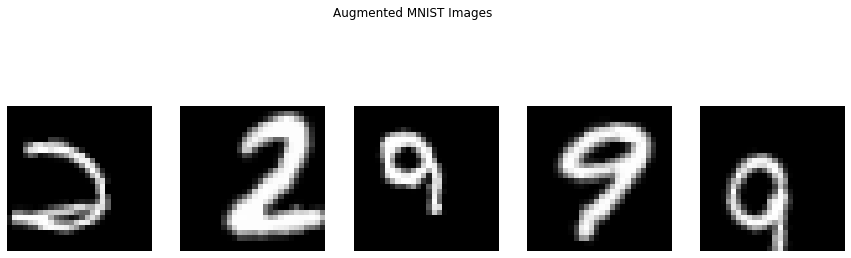

In [5]:

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation between 0-20 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    zoom_range=0.2,         # Random zoom
    horizontal_flip=False,   # No horizontal flip for MNIST
    fill_mode='nearest'     # Fill pixels with nearest pixel values
)

# Fit the generator to the training data
datagen.fit(X_train)

# Plot some augmented images
n_images = 5
plt.figure(figsize=(15, 5))

for i in range(n_images):
    # Generate a batch of augmented images
    augmented_images = datagen.flow(X_train, y_train, batch_size=1)

    # Get one augmented image
    img, _ = next(augmented_images)

    plt.subplot(1, n_images, i + 1)
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.axis('off')

plt.suptitle('Augmented MNIST Images')
plt.show()